In [2]:
import numpy as np
import pandas as pd
import seaborn as sn

In [3]:
# read the contents of the file into a pandas dataframe
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
# show sample row and column in dataset
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2504,ham,"Hello, my boytoy! I made it home and my consta...",NaN,NaN,NaN
1322,ham,Oh just getting even with u.... u?,NaN,NaN,NaN
675,ham,"I dont knw pa, i just drink milk..",NaN,NaN,NaN
784,ham,Dont think so. It turns off like randomlly wit...,NaN,NaN,NaN
4778,ham,O we cant see if we can join denis and mina? O...,NaN,NaN,NaN


In [16]:
# number of rows and columns in the dataset
df.shape

(5572, 5)

### Todo

* Data Cleaning
* Exploratory data analysis
* Preprocessing
* Evaluation of model performance
* Improvement
* Deployment

In [17]:
# details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop irrelevant columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [19]:
df.sample(5)

,v1,v2
2084,ham,How are you. Wish you a great semester
2303,ham,Should I tell my friend not to come round til ...
3095,ham,We walked from my moms. Right on stagwood pass...
3042,ham,Your bill at 3 is å£33.65 so thats not bad!
1843,ham,Super da:)good replacement for murali


In [7]:
# rename the columns
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [21]:
df.sample(5)

,target,text
1389,ham,"Haha... Where got so fast lose weight, thk muz..."
5251,ham,"Yeah work is fine, started last week, all the ..."
301,ham,"Shit that is really shocking and scary, cant i..."
3453,ham,I dont have any of your file in my bag..i was ...
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...


In [9]:
# check for values in the target column
df.target.unique()

array(['ham', 'spam'], dtype=object)

### Preprocessing

In [23]:
# label encoder converts the target column (categorical data) into numeric values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
df['target'] = encoder.fit_transform(df['target'])

In [25]:
# check the target column now
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Handle missing values in the dataset

In [26]:
df.isnull().sum()

target    0
text      0
dtype: int64

>- There are no missing values in the dataset

In [27]:
# check for duplicates
df.duplicated().sum()

403

>- There are 403 duplicated values in the dataset

In [28]:
# drop duplicated values but keep the first occurence
df = df.drop_duplicates(keep='first')

In [29]:
# Now let's check duplicated values again
df.duplicated().sum()

0

### Exploratory Data Anaysis

In [30]:
# check the number of 0s and 1s in the target column
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

>- There are 4516 0s and 653 1s in the dataset

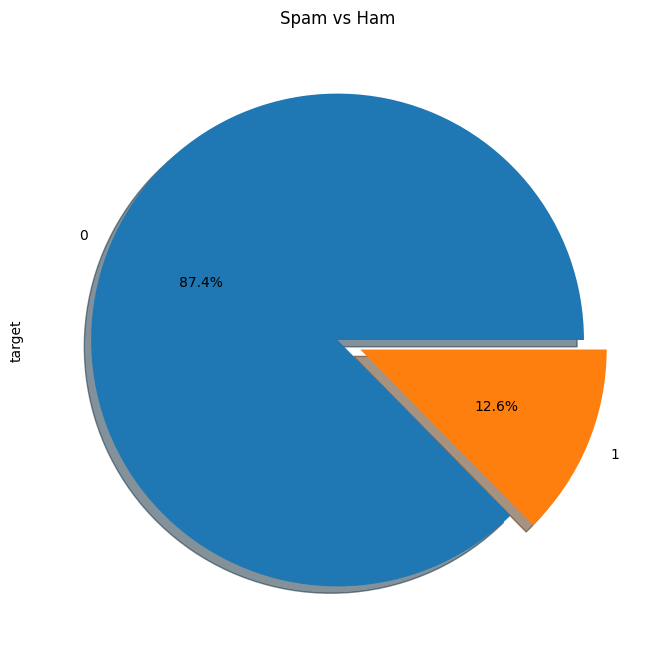

In [31]:
# plot the target column on a pie chart
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plot the target column on a pie chart
plt.figure(figsize=(8,8))
df.target.value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.title('Spam vs Ham')
plt.show()

>- We could see from the chat that, the target column is highly unbalanced

In [32]:
import nltk

In [34]:
# used for sentence segmentation
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/eben-
[nltk_data]     success/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# add num_characters column to the dataframe
df['num_characters'] = df['text'].apply(len)

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# Sentence segmentation: split the text into sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


### Data Proprocessing
>- Todo
* Lower case
* Tokenization: break down sentences in 
* Removing special characters
* Removing stop words and punctuation
* stemming

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/eben-
[nltk_data]     success/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [42]:
def transform_text(text):
    """
    convert text to lowercase
    tokenize the text
    remove special characters
    remove stopwords and punctuation
    stem the words
    """
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # convert words to their base forms
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
# test the transform_text function
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
# testing how PorterStemmer works
# PorterStemmer transforms any word to it's based word

ps = PorterStemmer()
ps.stem('loving')
# ps.stem('cooling')

'love'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

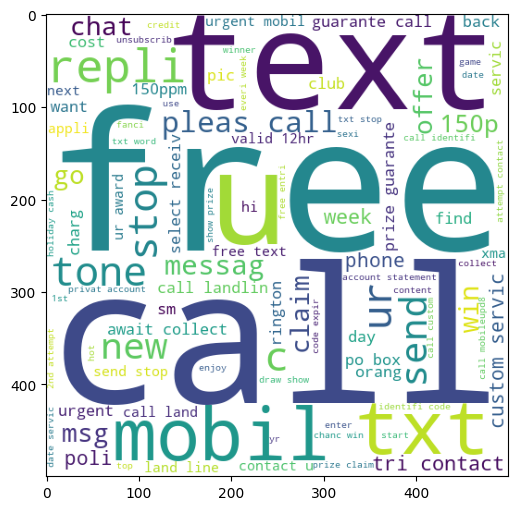

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

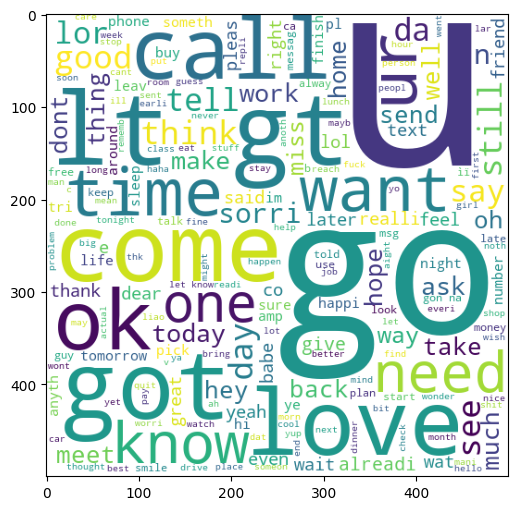

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### Building the model

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# create a CountVectorizer with max_features
# max_feature keeps the most 3000 frequent words in this case
cv = CountVectorizer(max_features=3000)

# fit and transform the corpus using CountVectorizer
X_cv = cv.fit_transform(df['transformed_text'])

# create a TfidfTransformer
tfidf = TfidfTransformer()



In [55]:
X = tfidf.fit_transform(X_cv).toarray()

In [56]:
y = df['target'].values

## Training the model

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### tfidf --> MNB

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [72]:
# create performance_df
performanClassifierce_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:
performanClassifierce_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [76]:
performance_df1 = pd.melt(performanClassifierce_df, id_vars="Algorithm")

In [77]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [78]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [82]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [83]:
from sklearn.ensemble import StackingClassifier

In [84]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


### Saving the model

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [86]:
# from joblib import dump

# dump(tfidf, 'vectorizer.joblib')
# dump(mnb, 'model.joblib')

['model.joblib']